# Part II - Effect of Loan Characteristics on the Loans
## by Oyedele Samuel

## Investigation Overview

## Dataset Overview

> The dataset contains 113,937 loans with 81 variables including loan original amount, current loan status, term, prosper score, borrower rate (or interest rate),borrower income, and many others. A subset dataset of 77,543 loans with 20 variables was used for better exploration after data warangling.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the clean dataset into a pandas dataframe
loans_clean = pd.read_csv('LoanData.csv')

In [3]:
# convert Loan Status, Prosper Score, Prosper Score Alpha, Loan Original Month, Year, Income Range into ordered categorical types
ordinal_var_dict = {'LoanStatus' : ['Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress', 
                    'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 
                    'Past Due (91-120 days)', 'Past Due (>120 days)'], 'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'ProsperRatingAlpha': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA' ],
                    'LoanOriginationMonth': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    'LoanOriginationYear': [2009, 2010, 2011, 2012, 2013, 2014],
                    'IncomeRange':['Not employed','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    loans_clean[var] = loans_clean[var].astype(ordered_var)

## Distribution of Loan Original Amount

> The loan original amount distribution is trimodal, with one peak at 5000, second peak at 10000, and third peak at 15000. There's a low decrease in frequency of loan amount after 25000.

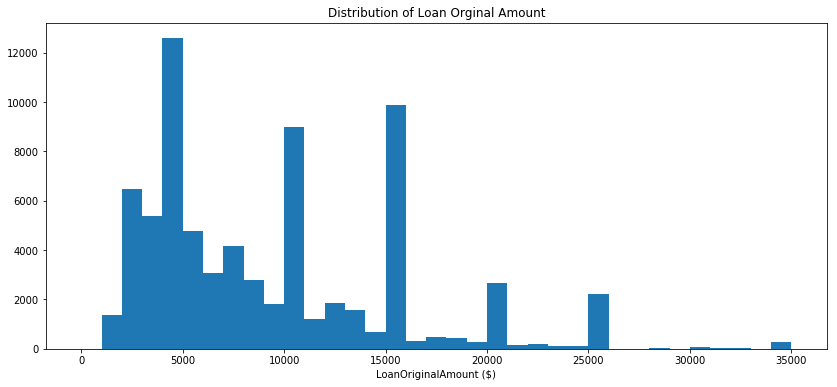

In [4]:
# create a standard histogram plot
binsize = 1000
bins = np.arange(0, loans_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[14,6])
plt.hist(data = loans_clean, x = 'LoanOriginalAmount', bins=bins)
plt.title('Distribution of Loan Orginal Amount')
plt.xlabel('LoanOriginalAmount ($)')
plt.show()

## Distribution of Income Range

> The income range distribution is bimodal, with one peak at (25,000 - 49,999) and, other peak at (50,000 - 74,999). People with no income tend to have the no loans

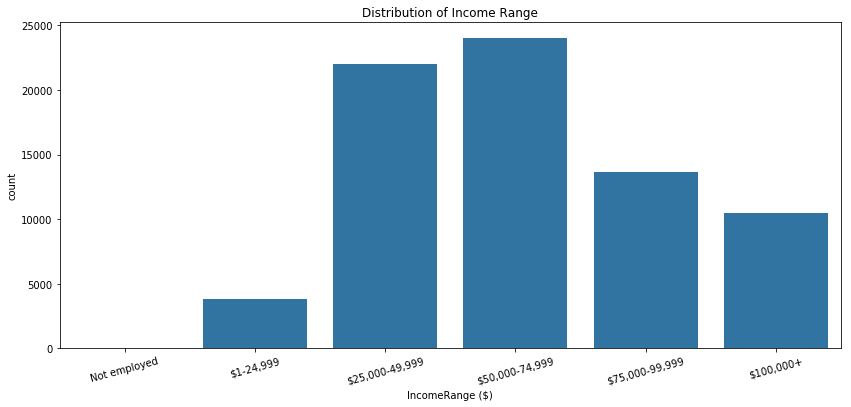

In [5]:
# plotting using seaborn bar plot

base_color = sb.color_palette()[0]

plt.figure(figsize=[14,6])
sb.countplot(data = loans_clean, x = 'IncomeRange', color = base_color)
plt.title('Distribution of Income Range')
plt.xlabel('IncomeRange ($)')
plt.xticks(rotation = 15)
plt.show()

## Distribution of Debt To Income Ratio

> From the distribution above, loan lenders tend to give more loans to borrowers with low debt income ratio (< 0.36). There's large spikes in frequency from range (0 - 0.36).

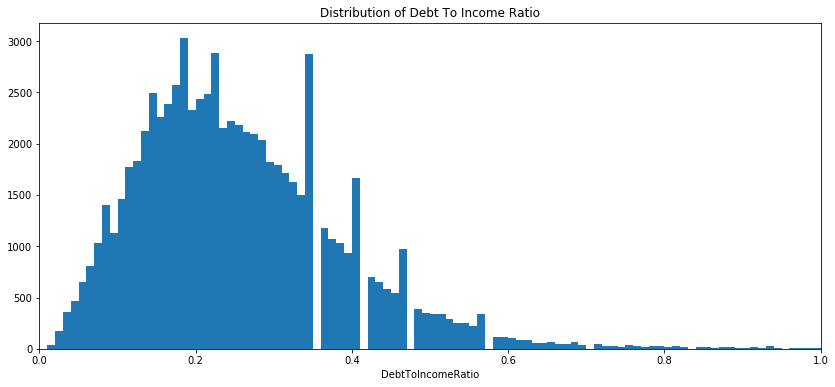

In [6]:
# investigating on a smaller bin size
binsize = 0.01
bins = np.arange(0, loans_clean.DebtToIncomeRatio.max()+binsize, binsize)

plt.figure(figsize=[14,6])
plt.hist(data = loans_clean, x = 'DebtToIncomeRatio', bins=bins)
plt.title('Distribution of Debt To Income Ratio')
plt.xlabel('DebtToIncomeRatio')
plt.xlim(0,1)
plt.show()

## Distribution of Monthly Loan Payment

> This distribution is unimodal. Monthly loan payment is slightly skewed right where more loans in the range of 0 - 500 monthly payment.

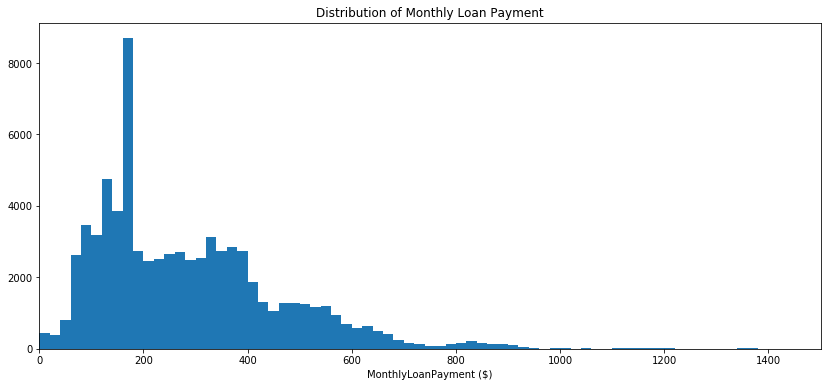

In [7]:
# create a standard histogram plot
binsize = 20
bins = np.arange(0, loans_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[14,6])
plt.hist(data = loans_clean, x = 'MonthlyLoanPayment', bins=bins)
plt.title('Distribution of Monthly Loan Payment')
plt.xlabel('MonthlyLoanPayment ($)')
plt.xlim(0, 1500)
plt.show()

## Distribution of Is Borrower Home Owner

> Over 60% of loans given to borrower are home owner.

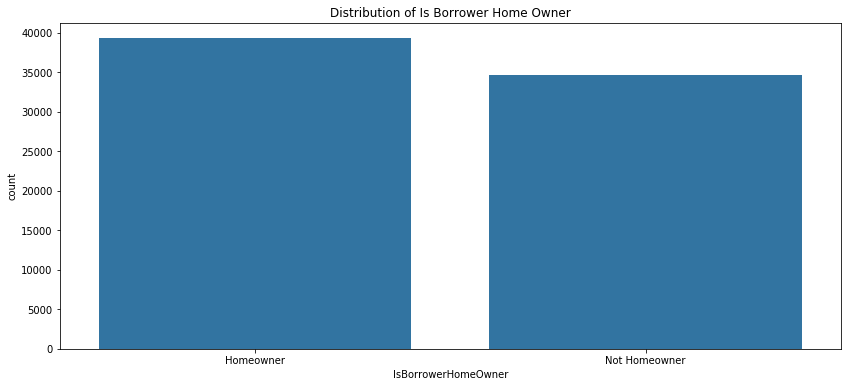

In [8]:
# plotting using seaborn plot
base_order = loans_clean.IsBorrowerHomeowner.value_counts().index
plt.figure(figsize=[14,6])
sb.countplot(data = loans_clean, x = 'IsBorrowerHomeowner', color = base_color, order = base_order)
plt.title('Distribution of Is Borrower Home Owner')
plt.xlabel('IsBorrowerHomeOwner')
plt.show()

## Loan Original Amount vs. Income Range

> From the plot below, the higher the income range, the higher the loan amounts given.

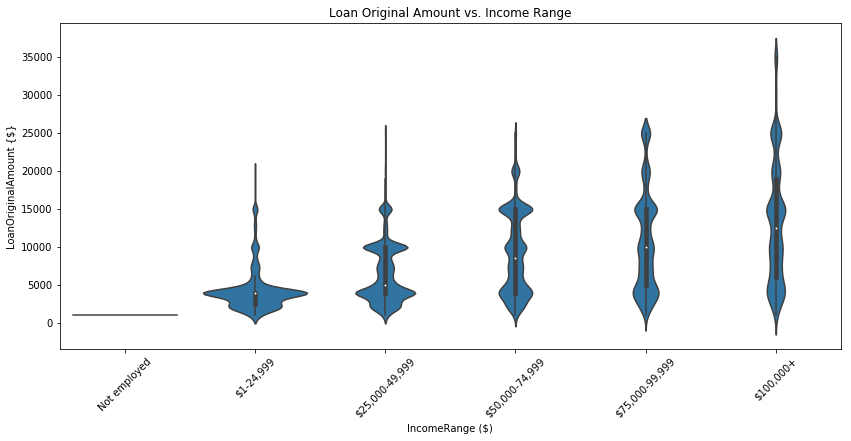

In [9]:
# violin plot of loan original amount vs income ramge
plt.figure(figsize=[14,6])
sb.violinplot(data = loans_clean, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.title('Loan Original Amount vs. Income Range')
plt.xlabel('IncomeRange ($)')
plt.ylabel('LoanOriginalAmount {$}')
plt.xticks(rotation = 45)
plt.show();

## Loan Original Amount vs. Monthly Loan Payment

> There is a strong relationship between loan original amount and monthly loan payment. The higher the loan amount, the higher the monthly loan payment.


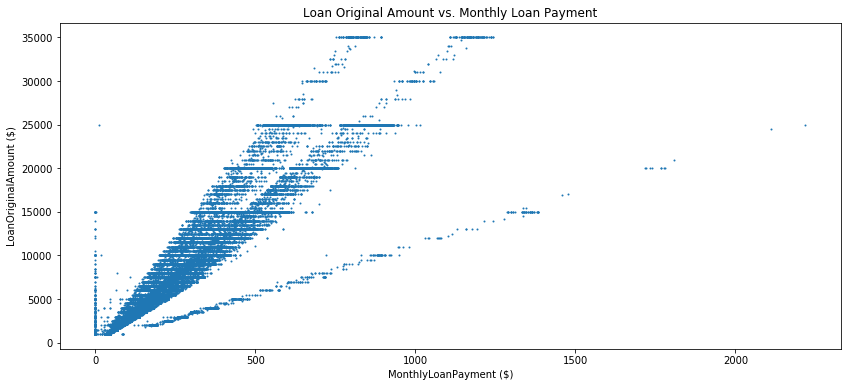

In [10]:
# scatter plot of loan original amount vs monthly loan payment
plt.figure(figsize=[14,6])
plt.scatter(data = loans_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', s=1)
plt.title('Loan Original Amount vs. Monthly Loan Payment')
plt.xlabel('MonthlyLoanPayment ($)')
plt.ylabel('LoanOriginalAmount ($)')
plt.show();

## Loan Original Amount vs. Loan Status

> From the plot below, an average loan amounts of 5,000 are completed while average loan amounts of 10,000 are current.

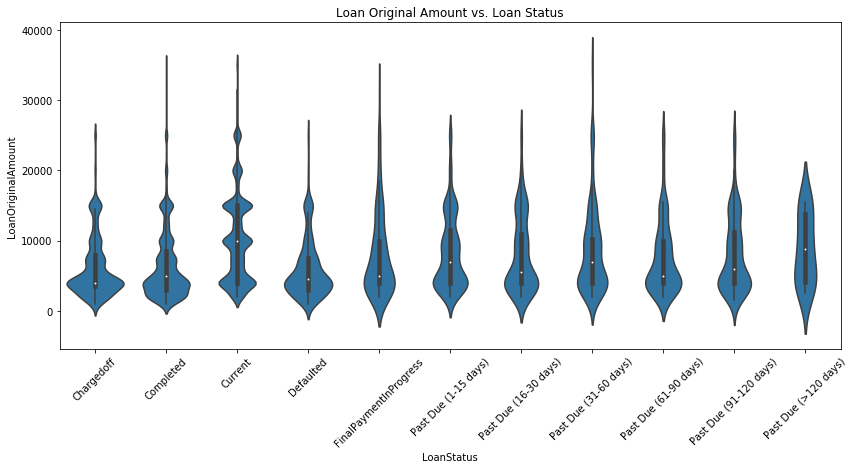

In [11]:
# violin plot of loan original amount vs loan status
plt.figure(figsize=[14,6])
sb.violinplot(data = loans_clean, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color)
plt.title('Loan Original Amount vs. Loan Status')
plt.xlabel('LoanStatus')
plt.ylabel('LoanOriginalAmount')
plt.xticks(rotation = 45)
plt.show();

## Monthly Loan Payment vs. Stated Monthly Income

> There's a weak postive relationship between them. 

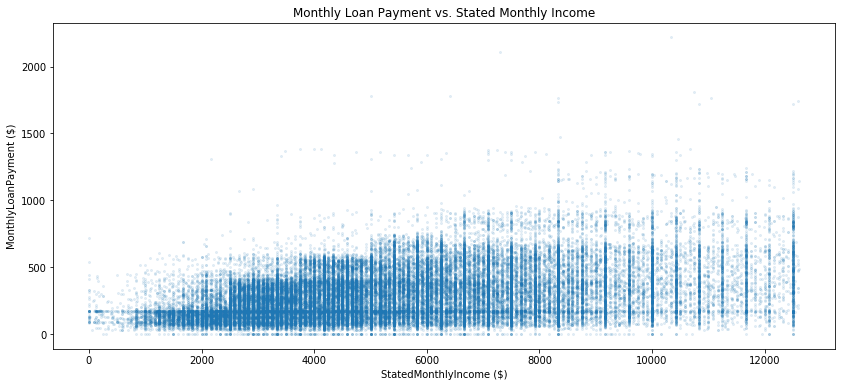

In [12]:
# scatter plot of monthly loan payment vs stated monthly income
plt.figure(figsize=[14,6])
plt.scatter(data = loans_clean, x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment', alpha = 1/10, s = 4)
plt.title('Monthly Loan Payment vs. Stated Monthly Income')
plt.xlabel('StatedMonthlyIncome ($)')
plt.ylabel('MonthlyLoanPayment ($)')
plt.show();

## Loan Original Amount and Monthly Loan Payment by Loan Origination Year
> There is a increase in loan original amount and monthly loan payment across the year. This show a postive interaction between the numeric variables and categorical variables.

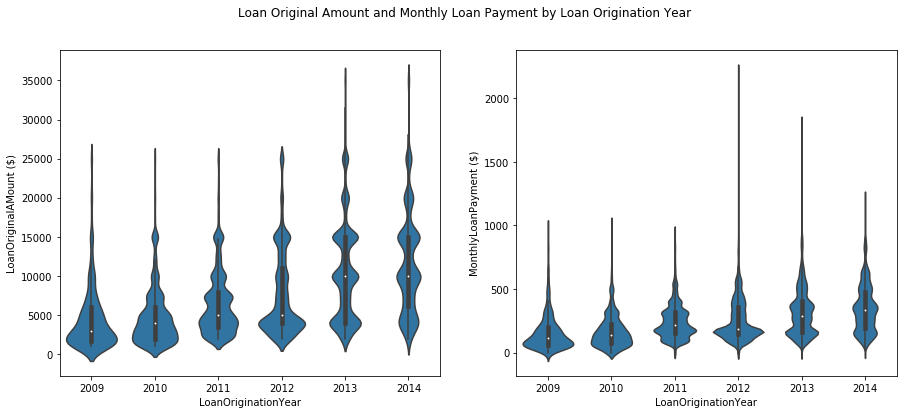

In [13]:
fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
color = sb.color_palette()[0]
sb.violinplot(data = loans_clean, x = 'LoanOriginationYear', y = 'LoanOriginalAmount', ax = ax[0], color = color)
ax[0].set_xlabel("LoanOriginationYear")
ax[0].set_ylabel('LoanOriginalAMount ($)')

sb.violinplot(data = loans_clean, x = 'LoanOriginationYear', y = 'MonthlyLoanPayment', ax = ax[1], color = color)
ax[1].set_xlabel("LoanOriginationYear")
ax[1].set_ylabel('MonthlyLoanPayment ($)')
fig.suptitle('Loan Original Amount and Monthly Loan Payment by Loan Origination Year')
plt.show();

### Loan Original Amount by Prosper Score and Loan Origination Year for Selected Debt To Income Ratio

> They are more debt to income ratio in 2009 with lower loans and few debt to income ratio in 2014 with higher loans. More high quality prosper score in 2014 than in other year. There is also increase in high quality level of prosper score and loans across the year.

In [14]:
# select debt to income ratio of approximately 1 ratio
loans_ratio = loans_clean[(loans_clean.DebtToIncomeRatio  > 0.1 ) & (loans_clean.DebtToIncomeRatio  <= 1 )]

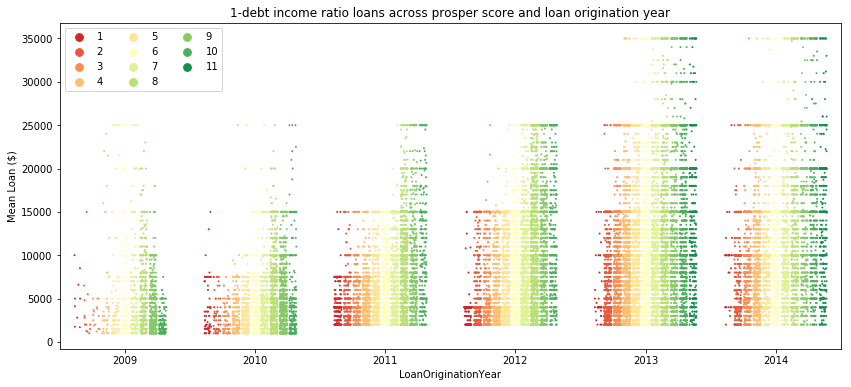

In [15]:
# plot a scatter based on the selected debt to income ratio
fig = plt.figure(figsize = [14,6])
ax = sb.stripplot(data = loans_ratio, x = 'LoanOriginationYear', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'RdYlGn', size =2, jitter = 0.3, dodge = True)
plt.title('1-debt income ratio loans across prosper score and loan origination year')
plt.ylabel('Mean Loan ($)')
plt.legend(ncol = 3)
plt.show();

In [ ]:
# save as a slide presentation
!jupyter nbconvert ProsperLoanData_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook ProsperLoanData_slide_deck.ipynb to slides
[NbConvertApp] Writing 819816 bytes to ProsperLoanData_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/ProsperLoanData_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg